2.	You are CEO of a clothing company with outlets in many cities. You have decided to open an outlet in a new city. To help with the decision of selecting a city, you decide to look at population vs profit data and apply linear regression to see if any relation exists between population & profit with population being the independent variable. <br>
a.	Apply Batch LMS, Mini batch, Stochastic LMS and Least Square closed form solution and compare the results. Plot the graphs of the obtained results and training data. Use the learning rate of 0.001. Analyse the results (Convergence time, accuracy etc.) (Don’t use in-built packages.) <br>
b.	Manually perform the locally weighted least linear regression using the first four data points given in excel sheet. Query point is 7.576 and bandwidth parameter is 0.5. Perform four iterations by using stochastic LMS. <br>
c.	Compare the results of Elastic net, Lasso and Ridge regression. (Use in-built packages) 
Note: Data for the question one is provided in the excel file “q1.xlsx”. Negative values in the profit column mean a loss. <br>


In [65]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import time

In [66]:
file_path = "./q1.xlsx"
data = pd.read_excel(file_path)
data.head()

,"Population in 10,000's",Profit In Lakhs(Rs)
0,6.2101,17.6920
1,5.6277,9.2302
2,8.6186,13.7620
3,7.1032,11.9540
4,5.9598,6.9233


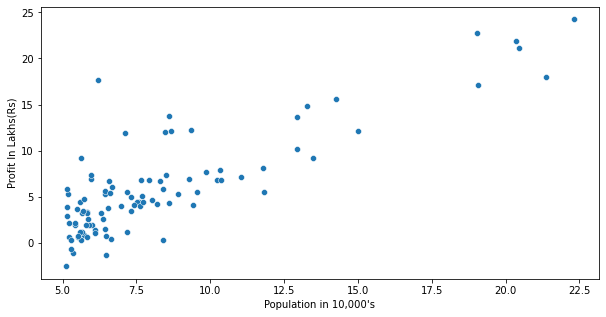

In [67]:

plt.figure(figsize=(10,5))
data_plot = sns.scatterplot(data = data, x = data.iloc[:, 0],  y= data.iloc[:, 1])

<h2>Question 2: Part A<h2>
<h3>Batch LMS<h3>

----------------------------------------------------------
Batch LMS
Number of Epoches and Iterations:  25255
The Values of theta for Batch LMS Method [[-3.85879218]
 [ 1.18742286]]
The Final cost is:  4.477254157145168
Time Taken:  0.6852922439575195 seconds
----------------------------------------------------------


Text(0.5, 1.0, 'Cost vs Number of iterations: BatchLMS')

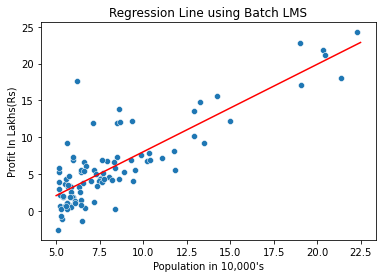

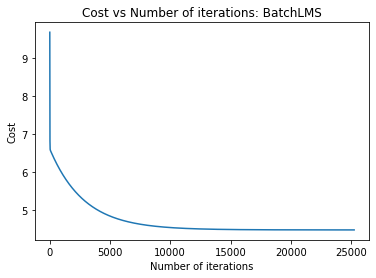

In [68]:
ones = np.ones(len(data))
x_only = np.array(data.iloc[:, 0])
X = np.stack([ones, x_only], axis = 1)
Y = np.array(data.iloc[:, 1]).reshape(len(data),1)
theta_initial = np.array([1.0,1.0]).reshape(2,1)

def grad(X, Y, theta):
    g = X.T.dot((np.dot(X, theta) -Y))/len(Y)
    return g


def batch_LMS(x, y, theta, alpha):
    print("----------------------------------------------------------")
    print("Batch LMS")
    error = 1
    count = 0
    cost_vs_itr = []
    begin = time.time()
    while (error) > 1.e-7:
        theta_new = theta - alpha*(grad(x, y, theta))
        cost = (0.5/len(y))*np.sum(np.square(np.dot(x, theta)-y))
        cost_new = (0.5/len(y))*np.sum(np.square(np.dot(x, theta_new)-y))
        error = np.absolute((cost_new - cost)) 
        theta = theta_new
        count+=1
        cost_vs_itr.append([cost_new, count])
    end = time.time()
    print("Number of Epoches and Iterations: ",count)
    print("The Values of theta for Batch LMS Method",theta)
    print("The Final cost is: ", cost_new)
    print("Time Taken: ", end - begin,"seconds")
    print("----------------------------------------------------------")
    return theta, pd.DataFrame(cost_vs_itr)

theta, graph = batch_LMS(X , Y, theta_initial, 0.001)
    
a = np.linspace(5,22.5,1000)
b =theta[1][0]*a + theta[0][0]
plt.figure()
sns.scatterplot(data = data, x = data.iloc[:, 0],  y= data.iloc[:, 1])
plt.plot(a,b,'r')
plt.title("Regression Line using Batch LMS")

plt.figure()
batch_lp = sns.lineplot(data=graph, x =graph.iloc[:, 1], y =graph.iloc[:, 0] )
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.title("Cost vs Number of iterations: BatchLMS")
#


<h3>Mini Batch<h3>

----------------------------------------------------------
Mini Batch LMS
Number of Epoches:  12802
Number of iterations:  128020
The Values of theta for Batch LMS Method [[-3.91426366]
 [ 1.19724299]]
The Final cost is:  4.912035542489459
Time Taken:  5.734387159347534 seconds
----------------------------------------------------------


Text(0.5, 1.0, 'Cost vs Number of iterations: Mini Batch')

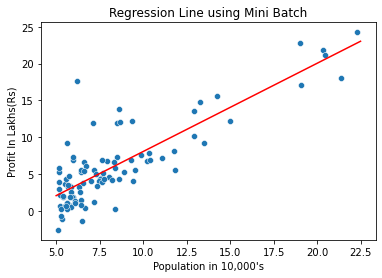

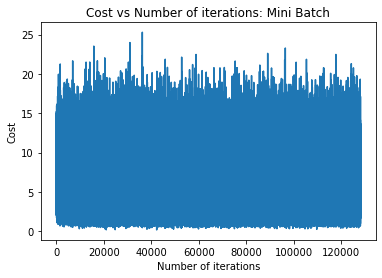

In [69]:
X_mini = np.stack([ones, x_only], axis = 1)
Y_mini = np.array(data.iloc[:, 1]).reshape(len(data),1)
theta_initial = np.array([1.0,1.0]).reshape(2,1)

def minibatch_gen(x, y, batchsize):
    batch = np.hstack((x,y))
    np.random.shuffle(batch)
    length = len(y)
    num = length//batchsize
    mini_batch = []

    for i in range(num + 1):
        if (i+1)*batchsize > length:
            mini = batch[(i)*batchsize:length]
            X = mini[:, :-1]
            Y = mini[:, -1].reshape((-1, 1))
            mini_batch.append([X, Y])
            continue

        mini = batch[(i)*batchsize: (i+1)*batchsize, :]
        X = mini[:, :-1]
        Y = mini[:, -1].reshape((-1, 1))
        mini_batch.append([X, Y])
            
    return mini_batch


def grad(X, Y, theta):
    g = X.T.dot((np.dot(X, theta) -Y))/len(Y)
    return g


def MiniBatch_LMS(x, y, theta, alpha):
    print("----------------------------------------------------------")
    print("Mini Batch LMS")
    error = 1
    count = 0
    j=0
    cost_vs_itr = []
    begin = time.time()
    while (error) > 1.e-6:

        for batch in minibatch_gen(x,y,10):
            X = batch[0]
            Y = batch[1]
            cost = (0.5/len(Y))*np.sum(np.square(np.dot(X, theta)-Y))
            gradient = grad(X, Y, theta)
            theta = theta - alpha*gradient
            cost_new = (0.5/len(Y))*np.sum(np.square(np.dot(X, theta)-Y))
            error = np.absolute((cost_new - cost))
            count+=1
            cost_vs_itr.append([cost_new, count])
        j+=1
    end = time.time()
    print("Number of Epoches: ",j)
    print("Number of iterations: ",count)
    print("The Values of theta for Batch LMS Method",theta)
    print("The Final cost is: ", cost_new)
    print("Time Taken: ", end - begin,"seconds")
    print("----------------------------------------------------------")
    return theta, pd.DataFrame(cost_vs_itr)

theta_mini, graph = MiniBatch_LMS(X , Y, theta_initial, 0.001)

a = np.linspace(5,22.5,1000)
b =theta_mini[1][0]*a + theta_mini[0][0]
plt.figure()
sns.scatterplot(data = data, x = data.iloc[:, 0],  y= data.iloc[:, 1])
plt.plot(a,b,'r')
plt.title("Regression Line using Mini Batch")

plt.figure()
batch_lp = sns.lineplot(data=graph, x =graph.iloc[:, 1], y =graph.iloc[:, 0] )
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.title("Cost vs Number of iterations: Mini Batch")
    


<h3>Stochastic LMS</h3>

----------------------------------------------------------
Stochastic LMS
Number of Epoches and iterations:  18815
The Values of theta for stochastic LMS Method [[-3.73455932]
 [ 1.17092425]]
The Final cost is:  4.480596156620541
Time Taken:  26.55198621749878 seconds
----------------------------------------------------------


Text(0.5, 1.0, 'Cost vs Number of iterations: StochasticLMS')

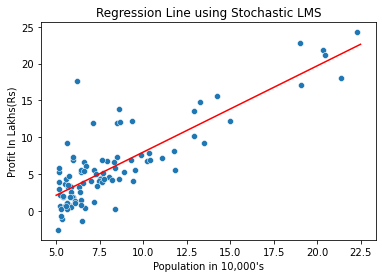

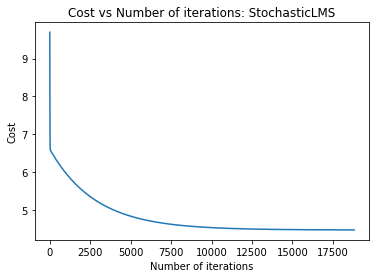

In [70]:

X_sto = np.stack([ones, x_only], axis = 1)
Y_sto = np.array(data.iloc[:, 1]).reshape(len(data),1)
theta_initial = np.array([1.0,1.0]).reshape(2,1)



def stochastic_LMS(x, y, theta, alpha):
    print("----------------------------------------------------------")
    print("Stochastic LMS")
    error = 1
    count = 0
    cost_vs_itr = []
    l = len(y)
    begin = time.time()
    j=0
    while error >1.e-6: 
        cost = (0.5/len(y))*np.sum(np.square(np.dot(x, theta)-y))
        for i in range(len(y)):
            theta[0] = theta[0] - alpha*((np.dot(x[i], theta) -y[i])*x[i][0])/l
            theta[1] = theta[1] - alpha*((np.dot(x[i], theta) -y[i])*x[i][1])/l
        j+=1
        
        cost_new = (0.5/len(y))*np.sum(np.square(np.dot(x, theta)-y))
        error = np.absolute((cost_new - cost))
        cost_vs_itr.append([cost_new, j])
    end = time.time()
    print("Number of Epoches and iterations: ",j)
    print("The Values of theta for stochastic LMS Method",theta)
    print("The Final cost is: ", cost_new)
    print("Time Taken: ", end - begin,"seconds")
    print("----------------------------------------------------------")
    return theta, pd.DataFrame(cost_vs_itr)

theta_sto, graph_sto = stochastic_LMS(X_sto , Y_sto, theta_initial, 0.001)
a = np.linspace(5,22.5,1000)
b =theta_sto[1][0]*a + theta_sto[0][0]
plt.figure()

sns.scatterplot(data = data, x = data.iloc[:, 0],  y= data.iloc[:, 1])
plt.plot(a,b,'r')

plt.title("Regression Line using Stochastic LMS")

plot1 =plt.figure()
sns.lineplot(data=graph_sto, x =graph_sto.iloc[:, 1], y =graph_sto.iloc[:, 0] )
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.title("Cost vs Number of iterations: StochasticLMS")

<h3>Least Square Closed Form</h3>

----------------------------------------------------------
Least Square Closed Form
The Values of theta for Least Square Closed Form:  [[-3.91508424]
 [ 1.19303364]]
The Final cost is:  4.476971375975179
Time Taken:  0.0 seconds
----------------------------------------------------------


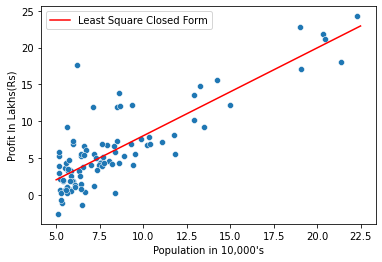

In [71]:

X_lsc = np.stack([ones, x_only], axis = 1)
Y_lsc = np.array(data.iloc[:, 1]).reshape(len(data),1)


def LeastSquare(x, y):
    print("----------------------------------------------------------")
    print("Least Square Closed Form")
    begin = time.time()

    theta = np.dot(np.linalg.inv(np.dot(x.T,x)),np.dot(x.T,y))
            
    end = time.time()
    cost = (0.5/len(y))*np.sum(np.square(np.dot(x, theta)-y))

   
    print("The Values of theta for Least Square Closed Form: ",theta)
    print("The Final cost is: ", cost)
    print("Time Taken: ", end - begin,"seconds")
    print("----------------------------------------------------------")
    return theta

theta_lsc= LeastSquare(X_lsc , Y_lsc)

a = np.linspace(5,22.5,1000)
b =theta_lsc[1][0]*a + theta_lsc[0][0]

plt.figure()

sns.scatterplot(data = data, x = data.iloc[:, 0],  y= data.iloc[:, 1])
plt.plot(a,b,'r', label= "Least Square Closed Form")
plt.legend()

<h3>Comparision Graph between above methods<h3>

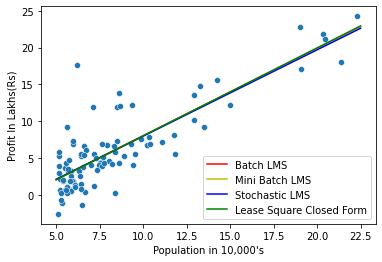

In [72]:
a = np.linspace(5,22.5,1000)
p1 =theta[1][0]*a + theta[0][0]
p2 = theta_mini[1][0]*a + theta_mini[0][0]
p3 =theta_sto[1][0]*a + theta_sto[0][0]
p4 =theta_lsc[1][0]*a + theta_lsc[0][0]
plt.figure()

sns.scatterplot(data = data, x = data.iloc[:, 0],  y= data.iloc[:, 1])
plt.plot(a,p1,'r', label= "Batch LMS")
plt.plot(a,p1,'y', label= "Mini Batch LMS")
plt.plot(a,p3, 'b', label= "Stochastic LMS")
plt.plot(a,p4,'g', label= "Lease Square Closed Form")
plt.legend()

<h2>Question 2: Part B<h2>
<h3>Locally Weighted Linear Regression<h3>

----------------------------------------------------------
Locally weighted Linear regression
Number of Epoches:  4
Number of Iterations:  16
The Values of theta for Locally weighted LR [-0.96170356  1.03829644]
The final cost is:  60.11176501219228
Time Taken:  0.0039958953857421875 seconds
----------------------------------------------------------


Text(0.5, 1.0, 'Cost vs Number of iterations: locally Weighted LR')

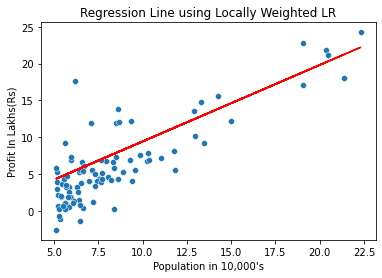

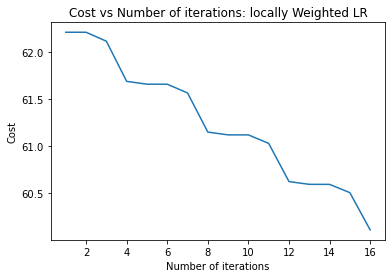

In [73]:
X_lwlr = np.stack([ones, x_only], axis = 1)[:4]
Y_lwlr = np.array(data.iloc[:, 1]).reshape(len(data),1)[:4]
theta_initial = np.array([-1.0,1.0]).reshape(2,1)
query_pt = 7.576

def lwlr(x,y,theta_,query_pt, bandwidth, alpha, iterations):
    print("----------------------------------------------------------")
    print("Locally weighted Linear regression")
    theta = theta_.copy()
    weight = np.exp(-((x-query_pt)**2)/(2*bandwidth**2))
    cost_vs_itr = []
    begin = time.time()
    count = 0

    for j in range(iterations):
        for i in range(len(y)):
            theta = theta - alpha*((weight[i]*(np.dot(x, theta) - y)[i])*x[i][0])/len(y)
            theta = theta - alpha*((weight[i]*(np.dot(x, theta) - y)[i])*x[i][1])/len(y)
            cost = (0.5/len(y))*np.sum(np.square(np.dot(x, theta)-y))
            count+=1
            cost_vs_itr.append([cost, count])


    end = time.time()
    print("Number of Epoches: ",j+1)
    print("Number of Iterations: ",count)

    print("The Values of theta for Locally weighted LR",theta[:,1])
    print("The final cost is: ", cost)
    print("Time Taken: ", end - begin,"seconds")
    print("----------------------------------------------------------")

    return theta[:,1], pd.DataFrame(cost_vs_itr)

theta_lwlr, graph_lwlr = lwlr(X_lwlr, Y_lwlr,theta_initial, query_pt,0.5, 0.001, 4) 

    
a = x_only
b = theta_lwlr[1]*a + theta_lwlr[0]
plt.figure()

sns.scatterplot(data = data, x = data.iloc[:, 0],  y= data.iloc[:, 1])
plt.plot(a,b,'r')

plt.title("Regression Line using Locally Weighted LR")

plot1 =plt.figure()
sns.lineplot(data=graph_lwlr, x =graph_lwlr.iloc[:, 1], y =graph_lwlr.iloc[:, 0] )
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.title("Cost vs Number of iterations: locally Weighted LR")

<h2>Question 2: Part C<h2>
<h3>Elastic Net, Lasso, Ridge Regression<h3>

In [74]:
from sklearn.linear_model import ElasticNet, Lasso, Ridge


----------------------------------------------------------
Elastic Net
The Values of theta for Elastic Net [-3.9144732] [1.19295967]
----------------------------------------------------------


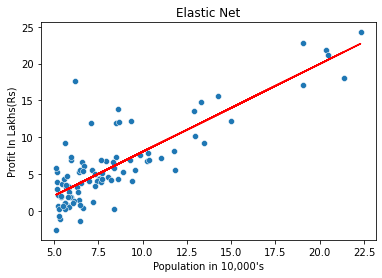

In [75]:
print("----------------------------------------------------------")
print("Elastic Net")
a = ElasticNet(alpha=0.001)
elastic_d = a
a.fit(x_only.reshape(-1,1),Y.reshape(-1,1))

print("The Values of theta for Elastic Net", a.intercept_, a.coef_)
print("----------------------------------------------------------")
plt.figure()
plt.title("Elastic Net")
sns.scatterplot(data = data, x = data.iloc[:, 0],  y= data.iloc[:, 1])
plt.plot(x_only,a.predict(x_only.reshape(-1,1)),'r')

----------------------------------------------------------
Lasso
The Values of theta for Lasso [-3.91452696] [1.19296618]
----------------------------------------------------------


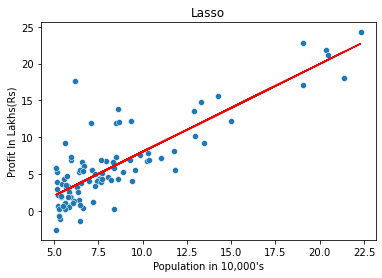

In [76]:
print("----------------------------------------------------------")
print("Lasso")
a = Lasso(alpha=0.001)
lasso_d = a
a.fit(x_only.reshape(-1,1),Y.reshape(-1,1))

print("The Values of theta for Lasso", a.intercept_, a.coef_)
print("----------------------------------------------------------")
plt.figure()
plt.title("Lasso")
sns.scatterplot(data = data, x = data.iloc[:, 0],  y= data.iloc[:, 1])
plt.plot(x_only,a.predict(x_only.reshape(-1,1)),'r')

----------------------------------------------------------
Ridge
The Values of theta for Ridge [-3.91507739] [[1.19303281]]
----------------------------------------------------------


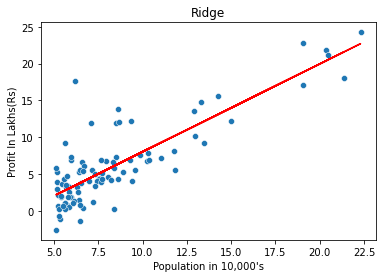

In [77]:
print("----------------------------------------------------------")
print("Ridge")
a = Ridge(alpha=0.001)
ridge_d = a
a.fit(x_only.reshape(-1,1),Y.reshape(-1,1))

print("The Values of theta for Ridge", a.intercept_, a.coef_)
print("----------------------------------------------------------")
plt.figure()
plt.title("Ridge")
sns.scatterplot(data = data, x = data.iloc[:, 0],  y= data.iloc[:, 1])
plt.plot(x_only,a.predict(x_only.reshape(-1,1)),'r')

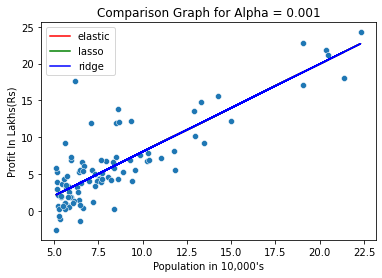

In [78]:
plt.figure()
plt.title("Comparison Graph for Alpha = 0.001")
sns.scatterplot(data = data, x = data.iloc[:, 0],  y= data.iloc[:, 1])
plt.plot(x_only,elastic_d.predict(x_only.reshape(-1,1)),'r', label="elastic")
plt.plot(x_only,lasso_d.predict(x_only.reshape(-1,1)),'g', label = "lasso")
plt.plot(x_only,ridge_d.predict(x_only.reshape(-1,1)),'b', label = "ridge")
plt.legend()